In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recent_date= session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

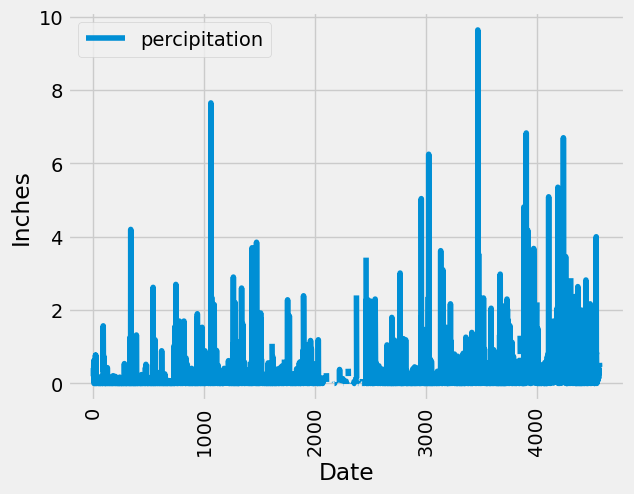

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.date(2017,8,23)- dt.timedelta(days=365)
last_date
# Calculate the date one year from the last date in data set.
start_date= last_date - dt.timedelta(365)
start_date

# Perform a query to retrieve the data and precipitation scores
date_prcp=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= start_date).all()
date_prcp
# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_df = pd.DataFrame(date_prcp, columns=['date','percipitation'])

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot()
plt.xticks(rotation= "vertical")

plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prcp_df.describe()

,percipitation
count,4091.000000
mean,0.205634
std,0.529369
min,0.000000
25%,0.000000
50%,0.020000
75%,0.160000
max,9.640000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = active_stations[0][0]

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).\
            filter(Measurement.station == active_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

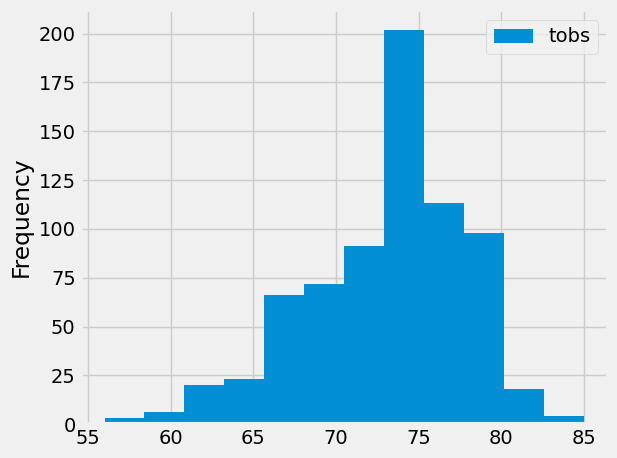

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == active_station_id).\
    filter(Measurement.date >= start_date).all()
#plot histogram
station_temp_obs = pd.DataFrame(results, columns=['tobs'])
station_temp_obs.plot.hist(bins=12)
plt.tight_layout()
plt.show()


# Close Session

In [56]:
# Close Session
session.close()